Saving ADANIPORTS.csv to ADANIPORTS (3).csv
MAE: 7.776232330827056
MSE: 135.2398098793225
r2: 0.9883649198476707
Predicted Next Day Closing Price: ₹741.30


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


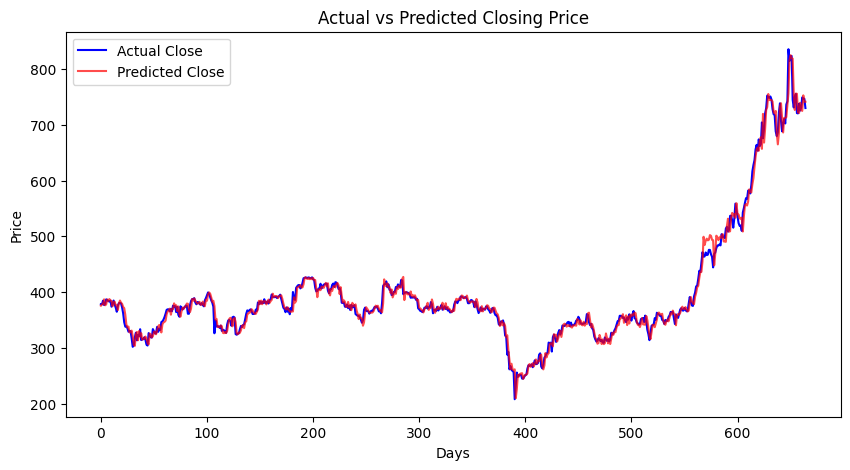

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
data=pd.read_csv("ADANIPORTS.csv")
data=data[["Date","Open","High","Low","Close","Volume"]]
data['Date'] = pd.to_datetime(data['Date'])
data=data.sort_values('Date')
data['Target']=data['Close'].shift(-1)
data=data.dropna()
X=data[['Open','High','Low','Close','Volume']]
y=data['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,shuffle=False)
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("r2:", r2)
latest_data=X.iloc[-1].values.reshape(1,-1)
next_day_pred=model.predict(latest_data)
print(f"Predicted Next Day Closing Price: ₹{next_day_pred[0]:.2f}")

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred, label='Predicted Close', color='red', alpha=0.7)
plt.title("Actual vs Predicted Closing Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
